# PHY 252 - Scientific Modeling and Data Analysis

![](images/xkcd_python.png)
[https://xkcd.com/353/](https://xkcd.com/353/ "xkcd 353")
<br><br><br><br><br><br><br><br><br><br><br><br><br>

## The computer is now an indespensible tool for the sciences.

For instance:

* Perfoming statistical analysis on a .txt file of data (GDP over time, star luminosity, gene expression...)

* Analytically solving mathematical equations

* Numerically solving mathematical equations (especially when no analytical solution exists)

* Making publication-quality plots

* Modelling dynamic systems (motion of a projectile acting under air resistance, predator-prey dynamics...)

While the computer is in many cases simply a tool for some experimental or theoretical project, it can also be used to perform advanced studies in the field of *computational science*.

## Let's look at a few examples of what we can do.
<br><br><br><br><br><br><br><br><br><br><br><br><br>


## The spectrum of hydrogen obeys the Balmer-Rydberg Formula:

$$ \Large \lambda = \left( R \left( \frac{1}{n^2} - \frac{1}{m^2} \right) \right) ^{-1},\text{ }m>n \text{ (integers)},\text{ }R = 1.097\times 10^{-2} \text{nm}^{-1}$$

### We can enumerate the first 8 $n=1$ lines (Lyman series) like so:

In [1]:
R = 1.097*10**(-2)
n = 1
for m in range(n+1,n+9):
    print(n,m,(R*((1/n**2)-1/m**2))**(-1))

1 2 121.5436037678517
1 3 102.55241567912488
1 4 97.23488301428137
1 5 94.95594044363415
1 6 93.76220862091418
1 7 93.05682163476148
1 8 92.60465048979178
1 9 92.2971741112124


<br><br><br><br><br><br><br><br><br><br><br><br><br>

## A list of numbers is hard to visualize, so perhaps we'd like to make a plot.

### We can make a simple figure like so:


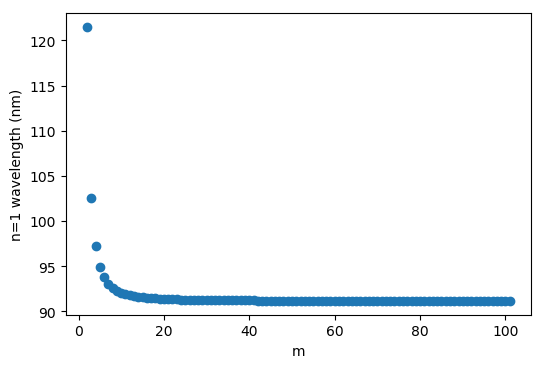

In [3]:
import matplotlib.pylab as plt

R = 1.097*10**(-2)
n = 1

x_vals = list(range(n+1,n+101))
y_vals = [(R*(1/n**2-1/m**2))**(-1) for m in x_vals]

fig = plt.figure(dpi=100)
plt.scatter(x_vals,y_vals)
plt.xlabel('m')
plt.ylabel('n=1 wavelength (nm)')
plt.show()


<br><br><br><br><br><br><br><br><br><br><br><br><br>

## We can also make figures for more complicated examples.

A damped pendulum obeys:

$$\LARGE y(t) = A\sin(\omega t)e^{-\alpha t}$$

### We can examine this like so:

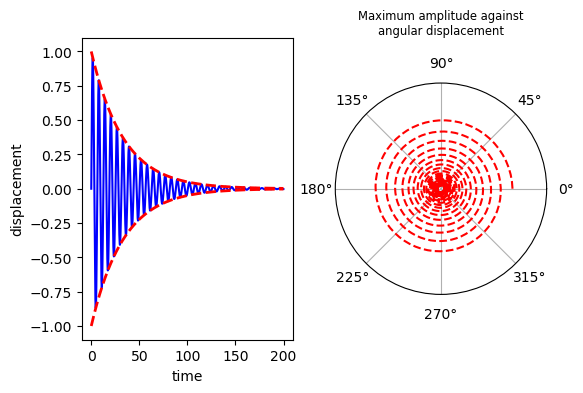

In [4]:
import numpy as np
import matplotlib.pylab as plt

# Define the parameters
A = 1.0
omega = 1.0
alpha = 0.03

# Populate lists for all of our variables
time = np.arange(0,200,0.1)
y = [A*np.sin(omega*t)*np.exp(-1*alpha*t) for t in time]
amp = [A*np.exp(-1*alpha*t) for t in time]
phi = [omega*t for t in time]

fig = plt.figure(dpi=100)
# Make the left plot, of position vs. time
plt.subplot(121)
plt.plot(time,y,'b-')
plt.plot(time,amp,'r--',lw=2)
plt.plot(time,[-1*x for x in amp],'r--',lw=2)
plt.xlabel('time')
plt.ylabel('displacement')

# Make the right plot, of maximum amplitude vs. angular position
ax2 = plt.subplot(122,projection='polar')
plt.plot(phi,amp,'r--')
ax2.set_rmax(A*1.5)
plt.yticks([])
plt.title('Maximum amplitude against\nangular displacement\n\n',size='small')
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br>
## As an example of analytical math, consider this integral:

$$\LARGE \int_{0}^\infty e^{-x} \sin(x)dx = ?$$

### We can evaluate this analytically like so:


In [5]:
from sympy import *
from IPython.display import display
init_printing(use_latex=True)
x = symbols('x')

integrate(exp(-x)*sin(x), (x, 0, oo))


In [6]:
from sympy import *
from IPython.display import display
init_printing(use_latex=True)
t, lamb = symbols('t \lambda',positive=True)
integrate(t*lamb*exp(-lamb*t),(t,0,oo))/integrate(lamb*exp(-lamb*t),(t,0,oo))

<br><br><br><br><br><br><br><br><br><br><br><br><br>

## It is also straightforward to plot this function, its integral, and the numerical value of its integral:

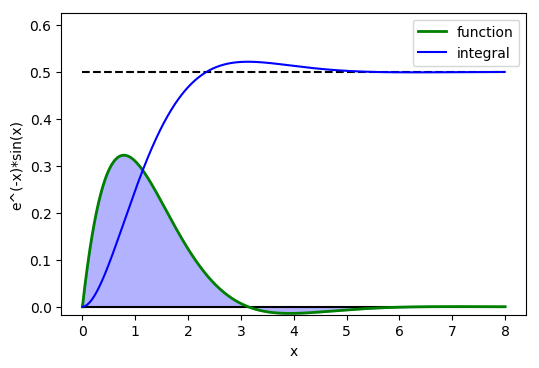

(0.5000000000000002, 1.4875911931534648e-08)


In [7]:
import numpy as np
import matplotlib.pylab as plt
import scipy.integrate as integrate

# first, acquire data for exp(-x)*sin(x)
xvals = np.linspace(0,8,1000)
yvals = [np.exp(-x)*np.sin(x) for x in xvals]

# then acquire its integral
yvals_cum = integrate.cumtrapz(yvals,dx=8/1000)

# make the figure
fig = plt.figure(dpi=100)
plt.plot(xvals,yvals,'g-',lw=2,label='function')
plt.plot(xvals[:len(yvals_cum)],yvals_cum,'b-',label='integral')
plt.xlabel('x')
plt.ylabel('e^(-x)*sin(x)')
plt.ylim(1.2*min(yvals),1.2*max(yvals_cum))
plt.hlines(y=0,xmin=0,xmax=8)
plt.hlines(y=0.5,xmin=0,xmax=8,linestyle='--')
plt.fill_between(xvals, yvals, y2=0,color='b',alpha=.3)  # include shading to indicate integral
plt.legend(loc='best')
plt.show()

# then, numerically determine the integral
result = integrate.quad(lambda x: np.exp(-x)*np.sin(x), 0, np.inf)
print(result)

<br><br><br><br><br><br><br><br><br><br><br><br>


### Example

Consider the shown circuit diagram. Kirchhoff's laws can be applied to determine a system of equations that describe the current in each continuous section of wire:

![](images/kirchhoff.png)

$$ \begin{aligned} I_1 &= I_2 + I_3 \\ E_1 - I_2 r_1 - I_1 R_1 - I_2 R_2 &= 0 \\ E_2 - I_3 r_2 -I_3 R_3 -I_1 R_1 &= 0 \end{aligned}$$

Or,

$$ \begin{pmatrix} 1 & -1 & -1 \\ R_1 & \left( R_2 + r_1 \right) & 0 \\ R_1 & 0 & \left( R_3 + r_2 \right) \end{pmatrix} \begin{pmatrix} I_1 \\ I_2 \\ I_3 \end{pmatrix} = \begin{pmatrix} 0 \\ E_1 \\ E_2 \end{pmatrix} $$

Solve this system of equations.

<br><br><br><br><br><br><br><br><br>

#### Pre-written Solution:

In [8]:
import numpy as np

M = np.array([[1,-1,-1],[6,3,0],[6,0,2]])
b = np.array([0,18,45])

solution = np.linalg.solve(M,b)
print("I1 = {0}  I2 = {1}  I3 = {2}".format(*solution))

I1 = 4.75  I2 = -3.5  I3 = 8.25


<br><br><br><br><br><br><br><br><br><br><br><br><br>

## As a final example, let's consider a 2D random walk.

The walker starts at the origin, and every step she randomly chooses a direction and moves 1 unit.

Let's write a program and make a plot of her position after 100 steps. 

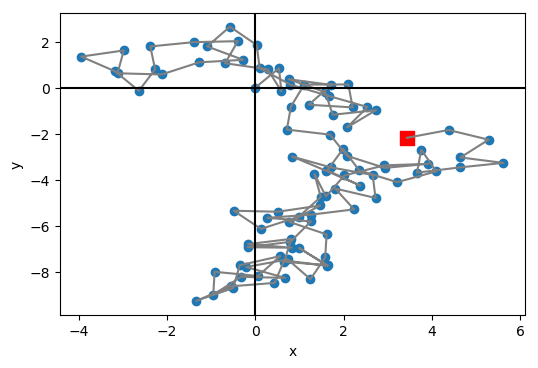

Walker traveled 4.06 units in 100 steps.


In [11]:
import numpy as np
import matplotlib.pylab as plt

# Determine position of each step
N = 100
dxns = (2*np.pi) * np.random.random_sample(N)
x,y = [0],[0]
for i in range(N):
    x += [x[-1]+np.cos(dxns[i])]
    y += [y[-1]+np.sin(dxns[i])]

# Make a figure
fig = plt.figure(dpi=100)
colors = np.linspace(.2,1,N)
colors = list(map(str,colors))
colors.reverse()
plt.scatter(x,y)
plt.plot(x,y,c='.5')
plt.scatter(x[-1],y[-1],s=100,c='r',marker='s')
plt.axhline(y=0,c='k')
plt.axvline(x=0,c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# How far did we go?
print('Walker traveled %.2f units in %s steps.'%(((x[-1]**2+y[-1]**2))**0.5,N))


<br><br><br><br><br><br><br><br><br><br><br><br><br>

## I know what you're thinking...

![](images/information_hose.jpg)

## ...but you'll learn to do all of this (and *much* more) in this class!

<br><br><br><br><br><br><br><br>

## Our rough outline for the course:

1. Introduction (basic calculations, commands, plotting, file input/output, loops, lists, arrays)

  + Scientific applications: random walks of bacteria, estimating $\pi$ <br><br>
  
2. More advanced plotting

  + Ready to go for SCEs, publications, technical reports <br><br>
  
3. Numerical Integration and Differentiation

  + Dynamic systems such as motion of planetary body, predator/prey dynamics <br><br>
  
  + Characterizing energy minimization, maximizing profits <br><br>

4. Solutions of linear and nonlinear equations

  + Matrix and vector algebra <br><br>
  
  + Resistor circuit analysis <br><br>

5. Fourier transforms

  + Frequency analysis of time-series data <br><br>
  
  + Cleaning of noisy data <br><br>
  
6. Ordinary and partial differential equations
  
  + Wide variety of physics problems <br><br>
  
  + Chaotic systems <br><br>
  
7. Random processes and Monte Carlo methods

  + Nuclear radiation processes <br><br>
  
  + Uncertainty estimation <br><br>

8. Animations and advanced topics

  + Dynamical systems <br><br>
  
  + 3D plotting

<br><br><br><br><br><br><br><br><br><br><br><br><br>



## Grading:


* 30% - Homework (including occasional mini-reports)
* 50% - Exams
* 20% - Mini-projects

<br><br><br><br><br><br><br><br><br><br><br><br><br>


## To proceed, make sure of the following:

* Install the Anaconda distribution of Python 3 on your laptop (and always bring it with you!)

* Make sure you can open the "Spyder" and "JupyterLab" programs once Anaconda is installed.

* Write and run a simple program consisting of the text: print("Hello World!")

## If you have trouble with any of this, come talk to me!

<br><br><br><br><br><br><br><br><br><br><br>
